# Derivadas numéricas em uma dimensão

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará



## Introdução

A derivada de uma função $y=f(x)$ é uma medida da sensibilidade da variável dependente $y$ em relação a mudanças na variável dependente $x$. A derivada de funções é a ferramenta fundamental do Cálculo e, portanto, da Física. Um dos princípais conceitos da Física é o conceito de trajetória, normalmente representada por uma função $\vec{r}(t)$. A velocidade $\vec{v}$ e a acelaração $\vec{a}(t)$, outro dois importantes conceito da Física, é encontrada atráves da primeira e segunda derivadas da trajetória em relação ao tempo, respectivamente:

$$\vec{v} = \frac{d \vec{r}}{dt}$$

$$\vec{a} = \frac{d \vec{v}}{dt} = \frac{d^2 \vec{r}}{dt^2}$$


A derivada também possui um conceito geométrico: a derivada de uma função de uma única variável em um determinado 
ponto, quando ela existir, representa a inclinação da linha tangente à função naquele ponto. Veja abaixo uma rápida demonstração da interpretação geométrica da derivada da função $y = x^2$.



In [1]:
# Carregando bibliotecas numérica e gráfica
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Carrega a biblioteca de widgets
from ipywidgets import interact
import ipywidgets as widgets


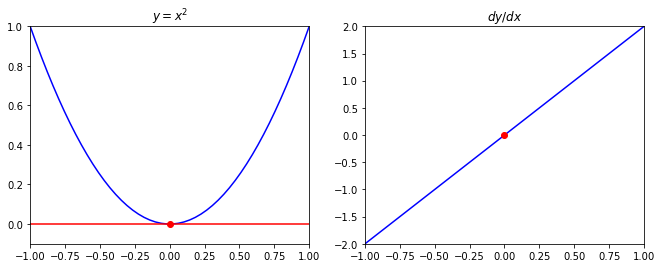

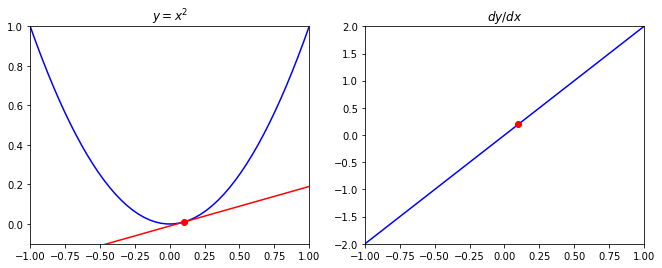

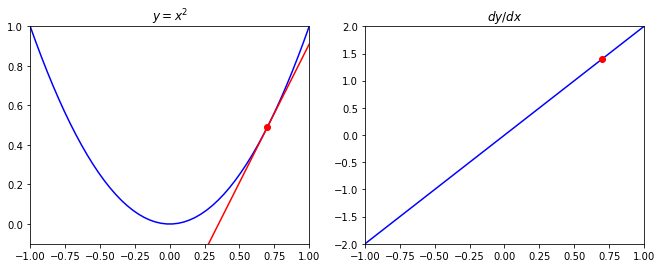

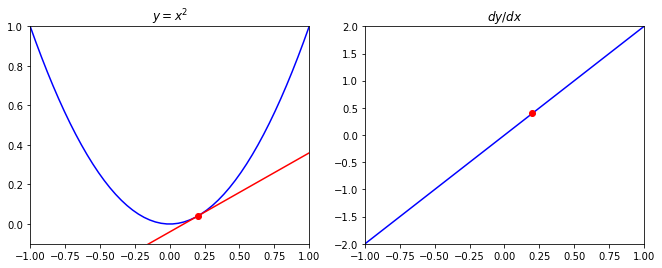

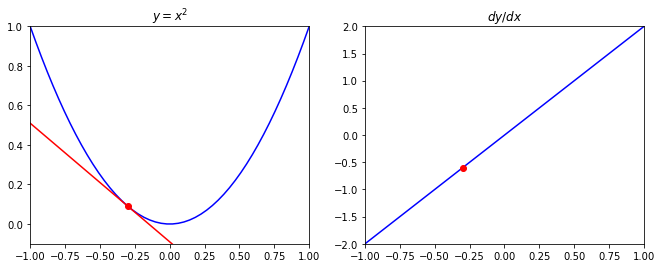

In [2]:
# definição de uma função que plota a função y=xˆ2 e 
# sua derivada em um ponto qualquer

def deriv(x1):

    y1 = x1**2
    a = 2*x1
    b = y1-a*x1

    # lista com os pontos do eixo x
    x = np.linspace(-1,1,50)
    
    # listas com os valores da função e sua derivada
    y , dy = x**2 , a*x+b

    # cria figura com dois graficos
    fig, axes = plt.subplots(1,2,figsize=(11, 4))

    # gráfico 1: função y = x^2
    axes[0].plot(x,y,'b-',x,dy,'-r',x1,y1,'or')
    axes[0].set_xlim([-1, 1])
    axes[0].set_ylim([-0.1, 1.0])
    axes[0].set_title('$y=x^2$')

    # gráfico 2: derivada dy/dx = 2*x
    axes[1].plot(x, 2*x,'b-',x1,2*x1,'or')
    axes[1].set_xlim([-1, 1])
    axes[1].set_ylim([-2, 2])
    axes[1].set_title('$d y/d x$')


# widget de demonstração

interact(deriv, x1=widgets.FloatSlider(min=-0.9,max=0.9,
                                step=0.1,value=0.0,
                                description = '$x_1$ = '));    

A definição formal de derivada de uma função $f(x)$ em um ponto $x$ é:
    
$$ \frac{d f}{d x} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $$ 

Pode-se também compreender graficamente o conceito do limite na definição acima:

In [27]:
def numderiv(x1,h):

    x = np.linspace(0,1,50)
    y = x**2

    #x1 = 0.06 
    y1 = x1**2
    x2 = x1+h
    y2 = x2**2

    a = (y2-y1)/(x2-x1)
    b = y1-a*x1

    dy = a*x+b

    plt.plot(x,y,'b-',x1,y1,'or',x2,y2,'or',x,dy,'k--')
    plt.axis([0,1, 0, 1])

    plt.show()

interact(numderiv, x1=(0.2,0.6,0.05),h=(0.01,0.2,0.005));        

interactive(children=(FloatSlider(value=0.4, description='x1', max=0.6, min=0.2, step=0.05), FloatSlider(value=0.105, description='h', max=0.2, min=0.01, step=0.005), Output()), _dom_classes=('widget-interact',))

## Derivadas numéricas

Podemos definir a derivada numérica a partir da definição da série de Taylor:

$$f(x+ \Delta x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x)}{n!}\Delta x^n$$


A série de Taylor é a representação de uma função $f(x)$ no ponto $x+\Delta x$ bem próximo a um ponto $x$ como uma soma infinita de termos calculados a partir das derivadas da função no ponto $x$. 

Em particular, a série de Taylor para dois pontos na $x\pm \Delta x$, deprezando-se termos de ordem superiores a $\Delta x^2$, assume a seguinte forma:

$$f(x + \Delta x) \approx f(x) + \frac{d f}{d x}\Delta x + \frac{1}{2} \frac{d^2 f}{d x^2}\Delta x^2$$

$$f(x - \Delta x) \approx f(x) - \frac{d f}{d x}\Delta x + \frac{1}{2} \frac{d^2 f}{d x^2}\Delta x^2$$

Subtraindo-se estas duas equações, obtem-se a expressão numérica da derivada com erro da ordem de $O(\Delta x^3)$ 

$$\frac{d f}{d x} = \frac{f(x + \Delta x)-f(x - \Delta x)}{2 \Delta x} + O(\Delta x^3)$$

Esta forma é chama de derivada numérica de ponto central. Se desprezássemos os termos de ordem superior a $\Delta x$ na série de Taylor, obteríamos duas possíveis expressões numéricas da derivada com  erro da ordem de $O(\Delta x^2)$:

$$\frac{d f}{d x} = \frac{f(x + \Delta x)-f(x)}{\Delta x} + O(\Delta x^2)$$

$$\frac{d f}{d x} = \frac{f(x) - f(x - \Delta x)}{\Delta x} + O(\Delta x^2)$$

Estas duas formas são chamadas de derivada numérica progressiva e regressiva, respectivamente.

Note que é possível obter a forma numérica da segunda derivada com erro da ordem de $O(\Delta x^3)$ somando-se as séries de Taylor truncadas:

$$\frac{d^2 f}{d x^2} = \frac{f(x + \Delta x)- 2 f(x) +f(x - \Delta x)}{\Delta x^2} + O(\Delta x^3) $$


## Derivadas numéricas de funções discretas

Sabe-se que uma função $f(x)$ de uma variável contínua $x$ é representada numericamente por um número finito $N$ de pontos igualmente distribuídos $x_{i+1} = x_i + \Delta x$. Sendo assim, a derivada numérica em cada ponto $x_i$ da função é obtida por:

**1a. derivada progressiva:**
$$\left[\frac{d f}{d x}\right]_{x_i} = \frac{f(x_{i+1})-f(x_i)}{\Delta x} + O(\Delta x^2)$$


**1a. derivada regressiva:**
$$\left[\frac{d f}{d x}\right]_{x_i} = \frac{f(x_{i})-f(x_{i-1})}{\Delta x} + O(\Delta x^2)$$

**1a. derivada de ponto central:**
$$\left[\frac{d f}{d x}\right]_{x_i} = \frac{f(x_{i+1})-f(x_{i-1})}{2\Delta x} + O(\Delta x^3)$$

**2a. derivada de ponto central:**
$$\left[\frac{d^2 f}{d x^2}\right]_{x_i} = \frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{\Delta x^2} + O(\Delta x^3)$$




## Exemplo 1: $y = \sin(x)$ 

Neste exemplo vamos calcular a 1a. e a 2a. derivada numérica da função $y = \sin(x)$ e compará-las com os resultados analíticos $dy/dx = \cos(x)$ e $d^2y/dx^2 = -\sin(x)$.

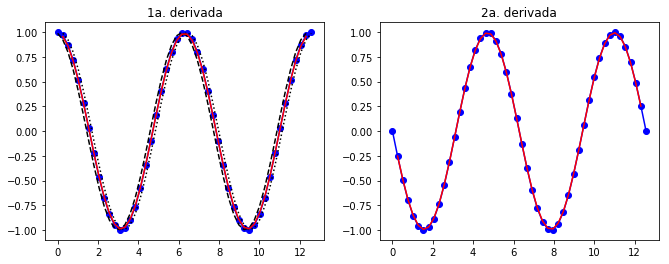

In [11]:
# intervalo e numero de pontos de plotagem
x1, x2 = 0, 4*np.pi
N = 50

# lista das coordenadas x
x = np.linspace(x1,x2,N)

# lista da função y = sin(x) e suas derivadas analíticas
y  = np.sin(x)
d1y = np.cos(x)
d2y = -np.sin(x)

# cálculo da 1a. derivada progressiva e regressiva (erro da ordem de dx^2)
d1yp = [(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(0,N-1)]

# cálculo da 1a. derivada progressiva e regressiva (erro da ordem de dx^2)
d1yr = [(y[i]-y[i-1])/(x[i]-x[i-1]) for i in range(1,N)]

# cálculo da 1a. derivada de ponto central (erro da ordem de dx^3)
d1yc = [(y[i+1]-y[i-1])/(x[i+1]-x[i-1]) for i in range(1,N-1)]

# cálculo da 2a. derivada de ponto central (erro da ordem de dx^3)
d2yc = [(y[i+1]-2*y[i]+y[i-1])/((x[i+1]-x[i])**2) for i in range(1,N-1)]


# cria figura com dois graficos
fig, axes = plt.subplots(1,2,figsize=(11, 4))

# gráfico 1: 1a. derivada
axes[0].plot(x,d1y,'bo-',
             x[0:(N-1)],d1yp,'k--',
             x[1:N]    ,d1yr,'k:',
             x[1:(N-1)],d1yc,'r')
axes[0].set_title('1a. derivada')

# gráfico 2: 2a. derivada
axes[1].plot(x,d2y,'bo-',
         x[1:(N-1)],d2yc,'r')
axes[1].set_title('2a. derivada')

plt.show()

## Exemplo 2: estimativa do erro


É importante notar que o cálculo numérico consiste em resolver problemas de váriaveis contínuas através de métodos de matemática discreta. Portanto, qualquer método numérico possui algum erro intrínseco. O importante é manter o erro sobre controle, de forma que a solução do problema numérico seja o mais próximo possível da solução real do problema contínuo.

O exemplo acima mostra que o descrever a derivada numerica através de uma série de Taylor truncada resulta em erro, ora da ordem de $\Delta x^2$, ora da ordem de $\Delta x^3$. Uma forma de mensurar este erro é do conceito do erro integrado:

$$erro = \sum \left|g(x_i) - \bar{g}(x_i)\right|$$

onde $g=d f/d x$, $g(x_i)$ é o valor exato da derivada analítica no ponto $x_i$, e $\bar{g}(x_i)$ é o valor aproximado da derivada numérica no mesmo ponto. Compare abaixo, o erro obtido nas diferentes aproximações.

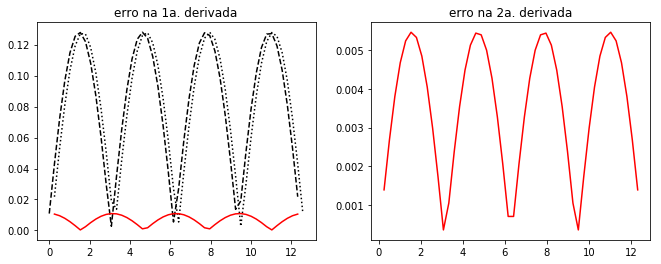

Espaçamento dx entre x[i] e x[i+1]: 0.256
Erro integrado na 1a. derivada progressiva: 3.993
Erro integrado na 1a. derivada regressiva: 3.993
Erro integrado na 1a. derivada de ponto central: 0.330
Erro integrado na 2a. derivada de ponto central: 0.171


In [12]:
# cálculo do erro em cada ponto x_i
err_d1yp = np.abs(d1yp-d1y[0:(N-1)]) 
err_d1yr = np.abs(d1yr-d1y[1:N])
err_d1yc = np.abs(d1yc-d1y[1:(N-1)])
err_d2yc = np.abs(d2yc-d2y[1:(N-1)])

# cálculo do erro integrado
int_err_d1yp = np.sum(err_d1yp)
int_err_d1yr = np.sum(err_d1yr)
int_err_d1yc = np.sum(err_d1yc)
int_err_d2yc = np.sum(err_d2yc)

# cria figura com dois graficos
fig, axes = plt.subplots(1,2,figsize=(11, 4))

# gráfico 1: 1a. derivada
axes[0].plot(x[0:(N-1)],err_d1yp,'k--',
             x[1:N]    ,err_d1yr,'k:',
             x[1:(N-1)],err_d1yc,'r')
axes[0].set_title('erro na 1a. derivada')

# gráfico 2: 2a. derivada
axes[1].plot(x[1:(N-1)],np.abs(d2yc-d2y[1:(N-1)]),'r')
axes[1].set_title('erro na 2a. derivada')

plt.show()

# exibição dos erros integrados
print("Espaçamento dx entre x[i] e x[i+1]: %5.3f" % (x[1]-x[0]))
print("Erro integrado na 1a. derivada progressiva: %5.3f" % int_err_d1yp)
print("Erro integrado na 1a. derivada regressiva: %5.3f" % int_err_d1yr)
print("Erro integrado na 1a. derivada de ponto central: %5.3f" % int_err_d1yc)
print("Erro integrado na 2a. derivada de ponto central: %5.3f" % int_err_d2yc)

**SUGESTÃO:** Repita o calculo acima para diferentes valores de $N$, e anotes os valores de $\Delta x$ e do erro integrado. Faça um gráfico do erro em função de $\Delta x$ e descreva o resultado em termos do erro de truncamento da série de Taylor.